In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from matplotlib import cm, colors
np.random.seed(42)

## Import Data

In [2]:
data = sc.read_loom('../data/osmFISH_SScortex_mouse_all_cells.loom')

AnnData object with n_obs × n_vars = 6471 × 33
    obs: 'ClusterID', 'ClusterName', 'Region', 'Total_molecules', 'Valid', 'X', 'Y', '_tSNE_1', '_tSNE_2', 'size_pix', 'size_um2'
    var: 'Fluorophore', 'Hybridization'

In [3]:
df = data.obs
df.head()

,ClusterID,ClusterName,Region,Total_molecules,Valid,X,Y,_tSNE_1,_tSNE_2,size_pix,size_um2
778,18,Inhibitory CP,Layer 6,390,1,18171.230942,24590.795275,-58.132385,5.219181,60911.0,257.348975
1409,18,Inhibitory CP,Internal Capsule Caudoputamen,279,1,19838.080895,6456.144687,-54.572380,12.113470,31781.0,134.274725
3642,18,Inhibitory CP,Layer 4,405,1,11247.433715,36626.892415,-61.572853,-1.185364,44143.0,186.504175
1302,18,Inhibitory CP,Internal Capsule Caudoputamen,132,1,19253.231299,7389.731237,-57.905106,9.225244,18163.0,76.738675
1285,18,Inhibitory CP,Internal Capsule Caudoputamen,276,1,19612.527467,10793.160566,-59.139568,7.926783,37353.0,157.816425


In [4]:
df = df[df['ClusterID'] != 0] #subset to the included cells.
df.reset_index(inplace=True)
df.head()

,index,ClusterID,ClusterName,Region,Total_molecules,Valid,X,Y,_tSNE_1,_tSNE_2,size_pix,size_um2
0,778,18,Inhibitory CP,Layer 6,390,1,18171.230942,24590.795275,-58.132385,5.219181,60911.0,257.348975
1,1409,18,Inhibitory CP,Internal Capsule Caudoputamen,279,1,19838.080895,6456.144687,-54.572380,12.113470,31781.0,134.274725
2,3642,18,Inhibitory CP,Layer 4,405,1,11247.433715,36626.892415,-61.572853,-1.185364,44143.0,186.504175
3,1302,18,Inhibitory CP,Internal Capsule Caudoputamen,132,1,19253.231299,7389.731237,-57.905106,9.225244,18163.0,76.738675
4,1285,18,Inhibitory CP,Internal Capsule Caudoputamen,276,1,19612.527467,10793.160566,-59.139568,7.926783,37353.0,157.816425


In [5]:
cell_type_names = np.array(df['ClusterName'].unique())
n_cell_types = len(cell_type_names)
print("%s unique cell types" % n_cell_types)

31 unique cell types


In [6]:
#Remap cell type IDs because they are not continuous for some reason

new_celltype_id_dict = dict(zip(cell_type_names, [x for x in range(0, len(cell_type_names))]))
df['Cluster_remap'] = df['ClusterName'].apply(lambda x: new_celltype_id_dict[x])
cell_type_names = np.array(df['Cluster_remap'].unique())


<ipython-input-6-a458b835a04e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_remap'] = df['ClusterName'].apply(lambda x: new_celltype_id_dict[x])


In [7]:
cmap = cm.get_cmap('nipy_spectral', n_cell_types)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(colors.rgb2hex(rgb))
    color_list.append(colors.rgb2hex(rgb))

In [8]:
type_color_dict = dict(zip(cell_type_names, color_list))
df['cell_type_color'] = df['Cluster_remap'].apply(lambda x: type_color_dict[x])

<ipython-input-8-10b725b3594e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_type_color'] = df['Cluster_remap'].apply(lambda x: type_color_dict[x])


In [9]:
reg_names = np.array(df['Region'].unique())
n_regions = len(reg_names)
print("%s unique region labels" % n_regions)

cmap = cm.get_cmap('nipy_spectral', n_regions)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(colors.rgb2hex(rgb))
    color_list.append(colors.rgb2hex(rgb))

reg_color_dict = dict(zip(reg_names, color_list))
df['reg_color'] = df['Region'].apply(lambda x: reg_color_dict[x])

11 unique region labels


<ipython-input-9-9a9a5dd1dc68>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg_color'] = df['Region'].apply(lambda x: reg_color_dict[x])


<Figure size 432x288 with 0 Axes>

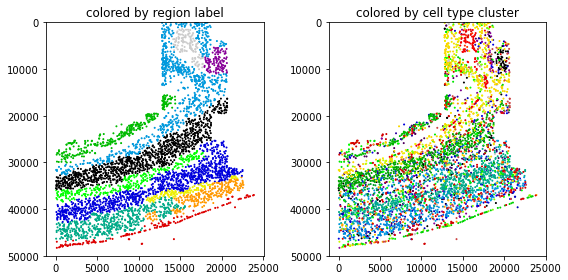

In [10]:
plt.clf()
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter(df['X'], df['Y'], color=df['reg_color'], marker='o', s=1)
ax1.set_title('colored by region label')
ax1.set_ylim(50000,0)
ax2.scatter(df['X'], df['Y'], color=df['cell_type_color'], marker='o', s=1)
ax2.set_title('colored by cell type cluster')
ax2.set_ylim(50000,0)
#plt.gca().invert_yaxis()
plt.savefig('../fig/full_data_region_type_sidebyside.pdf')
plt.tight_layout()
plt.show()

In [11]:
reg_names

array(['Layer 6', 'Internal Capsule Caudoputamen', 'Layer 4',
       'White matter', 'Layer 2-3 medial', 'Hippocampus', 'Layer 5',
       'Layer 3-4', 'Layer 2-3 lateral', 'Pia Layer 1', 'Ventricle'],
      dtype=object)

11 unique region labels


<ipython-input-24-b128c93e6c55>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg_color'] = df['Region'].apply(lambda x: reg_color_dict[x])


<Figure size 432x288 with 0 Axes>

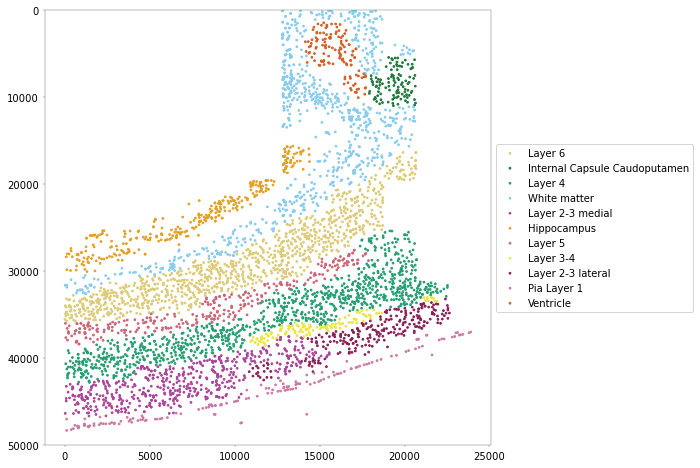

In [24]:
import matplotlib
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

reg_names = np.array(df['Region'].unique())
n_regions = len(reg_names)
print("%s unique region labels" % n_regions)

cmap = cm.get_cmap('tab20', n_regions + 5)

'''color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(colors.rgb2hex(rgb))
    color_list.append(colors.rgb2hex(rgb))'''

color_list = ['#CC6677', '#AA4599', '#882156','#E5A024', '#269E73', '#F0E441',
              '#D36027', '#CD79A7', '#20783C', '#89CCED', '#DDCB76', 
              ] #these are pretty colorblind friendly.
np.random.shuffle(color_list)
reg_color_dict = dict(zip(reg_names, color_list))
df['reg_color'] = df['Region'].apply(lambda x: reg_color_dict[x])


plt.clf()
fix, (ax1) = plt.subplots(1,1, figsize = (10,8))

for reg_name in reg_names:
    df_r = df[df['Region'] == reg_name]
    ax1.scatter(df_r['X'], df_r['Y'], color=df_r['reg_color'], marker='o', s=3, label=str(reg_name))
ax1.set_ylim(50000,0)
# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../fig/FigureS4B.pdf')

### Make region data

In [11]:
def calculate_tiles(min_x, max_x, min_y, max_y, tile_size):
    L = max_x - min_x
    W = max_y - min_y
    l = np.ceil(L/tile_size)
    w = np.ceil(W/tile_size)
    print(l, w)
    print(l*w)
    return int(l), int(w)

In [12]:
tile_size = 2000

min_x = int(np.floor(min(df['X'])))
max_x = int(np.ceil(max(df['X'])))

min_y = int(np.floor(min(df['Y'])))
max_y = int(np.ceil(max(df['Y'])))

l, w = calculate_tiles(min_x, max_x, min_y, max_y, tile_size)
x_bounds = [i for i in range(min_x, max_x+tile_size-1, tile_size)]
y_bounds = [i for i in range(min_y, max_y+tile_size-1, tile_size)]

tile_types_needed=[]

for i in range(1, len(x_bounds)):
    for j in range(1, len(y_bounds)):
        min_x = int(np.round(x_bounds[i - 1]))
        max_x = int(np.round(x_bounds[i]))
        min_y = int(np.round(y_bounds[j - 1]))
        max_y = int(np.round(y_bounds[j]))

        #Subset the dataframe 
        temp = df[(df['X'] >= min_x) & (df['X'] < max_x) & 
                  (df['Y'] >= min_y) & (df['Y'] < max_y)]
        
        if len(temp)> 2:
            values, counts = np.unique(np.array(temp['Region']), return_counts=True)
            tile_type = values[np.argmax(counts)]
        else:
            tile_type= 'null'
        tile_types_needed.append(tile_type)


12.0 25.0
300.0


In [13]:
tile_values, tile_counts = np.unique(tile_types_needed, return_counts=True)

In [14]:
region_id_dict = dict(zip(tile_values, [i for i in range(0, len(tile_values))]))
#region_id_dict['null'] = 0 

<Figure size 432x288 with 0 Axes>

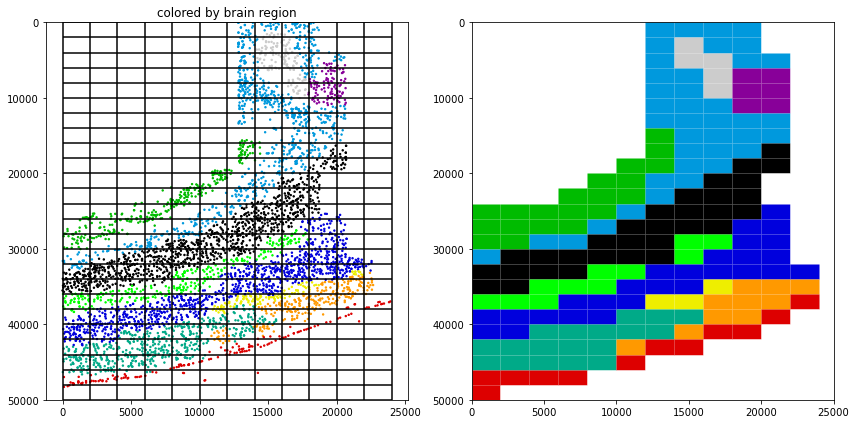

In [15]:
import matplotlib

plt.clf()
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
ax1.scatter(df['X'], df['Y'], color=df['reg_color'], marker='o', s=2)
ax1.hlines(y_bounds,min(x_bounds), max(x_bounds))
ax1.vlines(x_bounds,min(y_bounds), max(y_bounds))
ax1.set_ylim(50000,0)
ax1.set_title('colored by brain region')

patches=[]
for i in range(0, len(tile_types_needed)):
    tile_type = tile_types_needed[i]
    if tile_type != 'null':
        color = reg_color_dict[tile_type]
    else:
        color = '#FFFFFF'
    
    j = int(np.floor(i/w))
    k = int(i % w)
    
    #y_hi = y_bounds[k+1] - y_bounds[0]
    y_low = y_bounds[k] - y_bounds[0]
    x_low = x_bounds[j] - x_bounds[0]
    
    r = plt.Rectangle((x_low,y_low), x_bounds[1]- x_bounds[0], y_bounds[1]- y_bounds[0], facecolor=color)
    
    patches.append(r)

p = matplotlib.collections.PatchCollection(patches, match_original=True)
ax2.add_collection(p)
ax2.set_ylim(50000,0)
ax2.set_xlim(0,25000)
    
#plt.savefig('../fig/' + dataset_name + '_full_data_by_region.pdf')
plt.tight_layout()
plt.show()

## Reconstruct network of cells

In [16]:
from scipy import spatial, sparse

In [17]:
points = np.array([(df['X'][i], df['Y'][i]) for i in df.index])
point_tree = spatial.cKDTree(points) #efficient search structure

In [18]:
def find_neighbors(start_point, search_radius, point_tree):
    '''
    Returns
    -------
    list of indicies in points that are within search_radius of start_point.
    '''
    return point_tree.query_ball_point(start_point, search_radius)

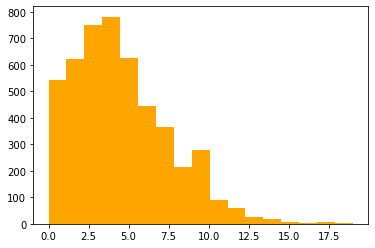

In [19]:
search_radius = 400 #1 pixel = 0.065μm
neighbors = [find_neighbors(points[i], search_radius, point_tree) for i in range(0, len(points))] 

#Visualize
neighbor_count_dist = [len(neighbors[i]) - 1 for i in range(0, len(neighbors))]
plt.hist(neighbor_count_dist, bins=17, color = 'orange')
plt.show()

### Build Graph

In [15]:
import networkx as nx

In [21]:
G = nx.Graph() #empty graph
node_ids = [i for i in df.index] #list of node_ids
G.add_nodes_from(node_ids)

#Connect the nodes
for i in range(0, len(node_ids)):
    for j in neighbors[i]:
        if j == i: 
            pass #no self loops
        else:
            G.add_edge(i, j)

In [101]:
sparse.save_npz('../data/osmfish_adjmat_'+str(search_radius) + 'px.npz', nx.to_scipy_sparse_matrix(G))

## Calculate full image parameters

In [13]:
import sys
sys.path.insert(0, "../../") #this is wild you need to fix this if you show anyone else

In [14]:
from spatialpower.neighborhoods import permutationtest as perm_test

In [24]:
A_full = sparse.load_npz('../data/osmfish_adjmat_400px.npz')
G_full = nx.from_scipy_sparse_matrix(A_full)

In [25]:
def build_assignment_matrix(attribute_dict, n_cell_types):
    data = list(attribute_dict.items())
    data = np.array(data)  # Assignment matrix

    B = np.zeros((data.shape[0], n_cell_types))  # Empty matrix

    for i in range(0, data.shape[0]):
        t = int(data[i, 1])
        B[i, t] = 1

    return B

In [26]:
attribute_dict = dict(zip(df.index, df['Cluster_remap']))
B_full = build_assignment_matrix(attribute_dict, n_cell_types)

In [27]:
p_full = np.divide(np.sum(B_full, axis=0), B_full.shape[0])
H_full = perm_test.calculate_neighborhood_distribution_sparse(A_full, B_full)

../../spatialpower/neighborhoods/permutationtest.py:170: RuntimeWarning: divide by zero encountered in true_divide
  aux1 = 1/edge_count_by_node


## Calulate region specific parameters

In [28]:
def calculate_region_params(reg_name, graph, df, save=True, ret_vals=False):
   
    reg_code = reg_name.replace(' ', '-')
    
    region_df = df[df['Region'] == reg_name]
    region_node_ids = [x for x in region_df.index] #the pd dataframe is 1-indexed but the graph is 0-indexed
    region_subgraph = G.subgraph(region_node_ids)
    
    #region_df['ClusterID'] = region_df['cell_type'].apply(lambda x: cell_type_id_dict[x])
    attribute_dict = dict(zip(region_node_ids, region_df['Cluster_remap']))
    
    A = nx.convert_matrix.to_scipy_sparse_matrix(region_subgraph)
    B = build_assignment_matrix(attribute_dict, n_cell_types)
    p = np.divide(np.sum(B, axis=0), A.shape[0])
    H = perm_test.calculate_neighborhood_distribution_sparse(A, B)
    
    if save:
        sparse.save_npz('../data/' + reg_code + '_A_'+ str(search_radius) + 'px.npz', A)
        np.save('../data/' + reg_code + '_B_'+ str(search_radius) + 'px.npy', B)
        np.save('../data/' + reg_code + '_p_'+ str(search_radius) + 'px.npy', p)
        np.save('../data/' + reg_code + '_H_'+ str(search_radius) + 'px.npy', H)
    
    if ret_vals:
        return A, B, p, H
    else:
        return
    

In [ ]:
for reg_name in reg_names:
    calculate_region_params(reg_name, G, df, save=True, ret_vals=False)

## Generate Tiles

In [12]:
import operator
from spatialpower.tissue_generation import assign_labels, random_circle_packing

ModuleNotFoundError: No module named 'spatialpower'

In [29]:
values, counts = np.unique(tile_types_needed, return_counts=True)
counts

array([ 20,   6,  10,  18,   3,  27,  11,  31,  12,   5,  39, 118])

### Heuristic

In [30]:
def generate_tiles_heuristic(adjacency_matrix, C, graph, p, H, reg_code, outdir, n_tiles):
    
    #Set up positions
    position_dict = dict()
    for i in range(0, C.shape[0]):
        position_dict[i] = C[i, :]
       
    i=0
    while i <= n_tiles:
        attribute_dict = assign_labels.heuristic_assignment(graph, p, H, 'region', 300, position_dict, 100)
        heuristic_B = build_assignment_matrix(attribute_dict, n_cell_types)
        np.save(outdir + str(reg_code) + '_tile' + str(i) + '_' + str(C.shape[0]) + 'cells.npy', heuristic_B)
        if i % 50 == 0: 
            print(i)
        i += 1
    
    return
    

In [31]:
adjacency_matrix = np.load('../data/A_28cells.npy')
C = np.load('../data/C_28cells.npy')
tile_count_dict = dict(zip(values, counts))
outdir = '../data/tiles/'
graph = nx.from_numpy_matrix(adjacency_matrix)

In [158]:
for j in range(0, len(values) - 1):
    reg_name = values[j]
    n_tiles = tile_count_dict[reg_name]
    print(reg_name)
    print("Generating %s tiles..." % n_tiles)
    outdir = '../data/tiles/'

    reg_code = reg_name.replace(' ', '-')


    p = np.load('../data/' + reg_code + '_p_'+ str(search_radius) + 'px.npy')
    H = np.load('../data/' + reg_code + '_H_'+ str(search_radius) + 'px.npy')

    generate_tiles_heuristic(adjacency_matrix, C, graph, p, H, reg_code, outdir, n_tiles)

Hippocampus
Generating 20 tiles
0
Internal Capsule Caudoputamen
Generating 6 tiles
0
Layer 2-3 lateral
Generating 10 tiles
0
Layer 2-3 medial
Generating 18 tiles
0
Layer 3-4
Generating 3 tiles
0
Layer 4
Generating 27 tiles
0
Layer 5
Generating 11 tiles
0
Layer 6
Generating 31 tiles
0
Pia Layer 1
Generating 12 tiles
0
Ventricle
Generating 5 tiles
0
White matter
Generating 39 tiles
0


## Stitching tiles 

### Composite C

In [166]:
import math 
tile_size = 300 #this is the size of the GENERATED TILE!
n_cells_per_tile = C.shape[0]

y_bounds = np.linspace(0, tile_size*w, num=w + 1)
x_bounds = np.linspace(0, tile_size*l, num=l + 1)

shifts = []
C_composite = C.copy()
for i in range(0, len(tile_types_needed)):
    
    if i > 0:
        horiz_pos = math.floor((i)/w) #returns a 0 indexed position in the row (x adjustment in composite)
        vert_pos = i % w #returns a 0 indexed position in the column (e.g. y adjustment in composite)
        #tile_type = tile_ids[i]
        x_inc = x_bounds[1]
        y_inc = y_bounds[1]

        x_adjustment = horiz_pos * x_inc
        y_adjustment = vert_pos * y_inc

        shifts.append([x_adjustment, y_adjustment])

        C_shift = np.zeros(C.shape)
        C_shift[:, 0] = C[:, 0] + x_adjustment + np.random.rand()
        C_shift[:, 1] = C[:, 1] + y_adjustment + np.random.rand()
        
        C_composite = np.vstack((C_composite, C_shift))

#Remove the elements of C that are in blank tiles. 
a, = np.where(np.array(tile_types_needed) == 'null')

C_composite_trim = C_composite.copy()
to_delete = []
for tile_id in a:
    temp = [i + n_cells_per_tile*tile_id for i in range(0, n_cells_per_tile)]
    for t in temp:
        to_delete.append(t)
        
mask = [i for i in range(0, C_composite.shape[0]) if i not in to_delete]

C_composite_trim = C_composite[mask]
np.save('../data/tiles/C_composite_trim.npy', C_composite_trim)

### Composite B

In [30]:
from glob import glob

In [171]:
B_lists = []
for i in range(0, len(values) - 1):
    reg_name = values[i] 
    reg_code = reg_name.replace(' ', '-')    
    
    B_list = glob('../data/tiles/'+ reg_code + '_*.npy')
    B_lists.append(B_list) 

B_dict = dict(zip(values[:-1],B_lists))

In [172]:
indices = dict(zip(values, [0 for i in range(0, len(values))]))
for i in range(0, len(tile_types_needed)):
    if i%100 == 0:
        print(i)
    tile_type = tile_types_needed[i]
    
    if tile_type != 'null':
        files = B_dict[tile_type]
        arr = files[indices[tile_type]]
        indices[tile_type] += 1
    
        if i == 0:
            B_composite = np.load(arr)
        else:
            try:
                B_composite = np.vstack((B_composite, np.load(arr)))
            except NameError:
                B_composite = np.load(arr)
            if np.load(arr).shape[0] != n_cells_per_tile:
                print(arr)

np.save('../data/tiles/B_composite.npy', B_composite)

0
100
200


### Composite Graph

In [30]:
adjacency_matrix = np.load('../data/A_28cells.npy')
C = np.load('../data/C_28cells.npy')
#R = np.load('../../R_51_cell_tissue_scaffold_tile.npy')
graph = nx.from_numpy_matrix(adjacency_matrix)

In [182]:
max_x = max(C[:,0])
max_y = max(C[:,1])
buffer = 30 #how close to the border we want to consider
x_edge_donors, = np.where(C[:, 0] > (max_x - buffer)) #these are the nodes close to the right side that need to be connected to
x_edge_acceptors, = np.where(C[:, 0] < buffer) #these are the nodes close to the left side that need to be connected to

In [185]:
a = np.hstack((x_edge_acceptors.reshape((x_edge_acceptors.shape[0],1)), C[x_edge_acceptors, :]))
a[a[:,2].argsort()] #sort by y position
b = a[a[:,2].argsort()]
sorted_x_edge_acceptors = b[:,0]

a = np.hstack((x_edge_donors.reshape((x_edge_donors.shape[0],1)), C[x_edge_donors, :]))
a[a[:,2].argsort()] #sort by y position
b = a[a[:,2].argsort()]
sorted_x_edge_donors = b[:,0]

y_edge_donors, = np.where(C[:, 1] > (max_y - buffer)) #these are the nodes close to the bottom side that need to be connected to
y_edge_acceptors, = np.where(C[:, 1] < buffer) #these are the nodes close to the top side that need to be connected to

a = np.hstack((y_edge_acceptors.reshape((y_edge_acceptors.shape[0],1)), C[y_edge_acceptors, :]))
a[a[:,1].argsort()] #sort by y position
b = a[a[:,1].argsort()]
sorted_y_edge_acceptors = b[:,0]

a = np.hstack((y_edge_donors.reshape((y_edge_donors.shape[0],1)), C[y_edge_donors, :]))
a[a[:,1].argsort()] #sort by y position
b = a[a[:,1].argsort()]
sorted_y_edge_donors = b[:,0]

In [186]:
x_stitch_dict = dict()
y_stitch_dict = dict()

for i in range(0, sorted_x_edge_donors.shape[0]):
    if i < len(sorted_x_edge_acceptors):
        donor_id = int(sorted_x_edge_donors[i])
        acceptor_id = int(sorted_x_edge_acceptors[i])
    else:
        #the donors list longer than acceptors
        donor_id = int(sorted_x_edge_donors[i])
        acceptor_id = int(sorted_x_edge_acceptors[-1]) #just stick it to the last node
    
    x_stitch_dict[donor_id] = acceptor_id
    
for i in range(0, sorted_y_edge_donors.shape[0]):
    if i < len(sorted_y_edge_acceptors):
        donor_id = int(sorted_y_edge_donors[i])
        acceptor_id = int(sorted_y_edge_acceptors[i])
    else:
        #the donors list longer than acceptors
        donor_id = int(sorted_y_edge_donors[i])
        acceptor_id = int(sorted_y_edge_acceptors[-1]) #just stick it to the last node
    
    y_stitch_dict[donor_id] = acceptor_id

In [187]:
new_graph = graph.copy()
composite_graph = nx.disjoint_union(graph, new_graph)

for i in range(0, len(tile_types_needed) - 2):
    #this can be quite slow for large n_tiles, be sure to save your result.
    #TO DO: implement alternative approach for speed. 
    if i % 100 == 0:
        print(i)
    composite_graph = nx.disjoint_union(composite_graph, new_graph) 

0
100
200


In [188]:
n_cells_per_tile = C.shape[0]
current_tile_id = 0
l=int(l)
w=int(w)
for tile_x_index in range(0, l):
    for tile_y_index in range(0,w):
        if tile_x_index < l - 1:
            if tile_y_index < w-1: 
                for i in sorted_y_edge_donors:
                    y_acceptor = y_stitch_dict[i]
                    source = int(i) + (n_cells_per_tile * current_tile_id)
                    target = y_acceptor + (n_cells_per_tile * (current_tile_id + 1))
                    composite_graph.add_edge(source, target)

                for i in sorted_x_edge_donors:
                    x_acceptor = x_stitch_dict[i]
                    source = int(i) + (n_cells_per_tile * current_tile_id)
                    #target = x_acceptor + (239 * (current_tile_id + 20))
                    target = (x_acceptor + (n_cells_per_tile * current_tile_id)) + (n_cells_per_tile * w)
                    composite_graph.add_edge(source, target)
            else:
                # we're in the bottom row, so only stitch horizontally.
                for i in sorted_x_edge_donors:
                    x_acceptor = x_stitch_dict[i]
                    source = int(i) + (n_cells_per_tile * current_tile_id)
                    target = (x_acceptor + (n_cells_per_tile * current_tile_id)) + (n_cells_per_tile * w)
                    composite_graph.add_edge(source, target)
                
        else:
            #we're in the last column, so only stitch vertically.
            if tile_y_index < w-1: 
                for i in sorted_y_edge_donors:
                    y_acceptor = y_stitch_dict[i]
                    source = int(i) + (n_cells_per_tile * current_tile_id)
                    target = y_acceptor + (n_cells_per_tile * (current_tile_id + 1))
                    composite_graph.add_edge(source, target)
            else:
                #this is the bottom right corner...everything is stitched!
                print("Done!")
           
        current_tile_id += 1
#sorted_y_edge_acceptors.astype(int) + (239 * tile_y_index)



Done!


In [189]:
#Remove the nodes of A that are in blank tiles. 
a, = np.where(np.array(tile_types_needed) == 'null')

for tile_id in a:
    #Get the nodes to delete:
    node_ids = [i + n_cells_per_tile*tile_id for i in range(0, n_cells_per_tile)]
    
    for n in node_ids:
        composite_graph.remove_node(n)

In [191]:
A_composite = nx.to_scipy_sparse_matrix(composite_graph)
sparse.save_npz('../data/tiles/A_composite.npz', A_composite)

## Visualize IST

In [17]:
B_composite = np.load('../data/tiles/B_composite.npy')
C_composite_trim = np.load('../data/tiles/C_composite_trim.npy')
A_composite = sparse.load_npz('../data/tiles/A_composite.npz')

In [18]:
type_dict = dict()
for i in range(0, B_composite.shape[0]):

    for j in range(0, B_composite.shape[1]):
        if B_composite[i, j] == 1:
            type_dict[i] = j
            
position_dict = dict()
for i in range(0, C_composite_trim.shape[0]):
    position_dict[i] = C_composite_trim[i, :]

In [19]:
point_list = [position_dict[i] for i in range(0, C_composite_trim.shape[0])]
colors = [type_color_dict[type_dict[i]] for i in range(0, B_composite.shape[0])]

<Figure size 432x288 with 0 Axes>

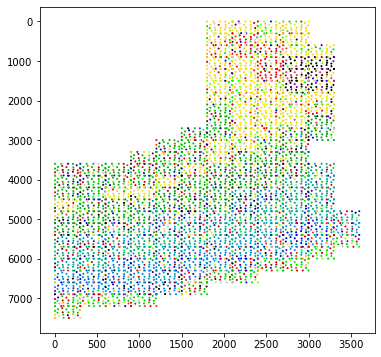

In [20]:
plt.clf()
fig, ax2 = plt.subplots(1,1,figsize=(6,6))
plt.scatter(np.array(point_list)[:,0], np.array(point_list)[:,1], c=colors, s=1)
#plt.hlines(y_bounds,min(x_bounds), max(x_bounds))
#plt.vlines(x_bounds,min(y_bounds), max(y_bounds))
#ax2.set(xlim=(0 - 0.01*ab[0], ab[0] + 0.01 * ab[0]), ylim=(7100, 0 - 0.01*ab[1]/2))
#plt.savefig('../fig/full_osmfish_brain_400px_300tiles_28cells.png', dpi=400)
plt.gca().invert_yaxis()
plt.show()

<Figure size 432x288 with 0 Axes>

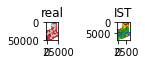

In [22]:
plt.clf()
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter(df['X'], df['Y'], color=df['cell_type_color'], marker='o', s=1)
ax1.set_title('real')
ax1.set_ylim(50000,0)
ax2.scatter(np.array(point_list)[:,0], np.array(point_list)[:,1], c=colors, s=1)
ax2.set_title('IST')
ax2.set_ylim(8000,0)
#plt.gca().invert_yaxis()
plt.savefig('../fig/full_osmFISH_data_real_IST_sidebyside.pdf')
plt.tight_layout()
plt.show()